# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=69)

## Visualize Dataset
This is the same code from Assignment 1

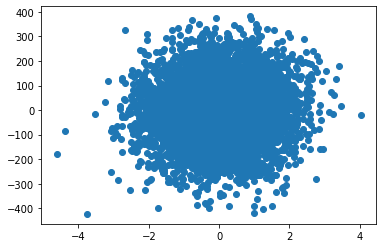

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.scatter(X_train[:,1],y_train)

# Your code here

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [38]:
import tensorflow as tf

from tensorflow import keras

model=keras.Sequential([
          tf.keras.layers.Dense(units=5, activation="relu", input_shape=[5]),
          tf.keras.layers.Dense(units=5, activation="relu"),
          tf.keras.layers.Dense(units=1)

])
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,decay=0.00001)
model.compile(optimizer=optimizer, loss='mse', metrics='mse')

In [39]:
tf.random.set_seed(69)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=300
)

Epoch 1/300
200/200 [==============================] - 1s 3ms/step - loss: 1676.2841 - mse: 1676.2841 - val_loss: 31.3073 - val_mse: 31.3073
Epoch 2/300
200/200 [==============================] - 0s 2ms/step - loss: 300.1492 - mse: 300.1492 - val_loss: 41.0943 - val_mse: 41.0943
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 168.5267 - mse: 168.5267 - val_loss: 43.0184 - val_mse: 43.0184
Epoch 4/300
200/200 [==============================] - 0s 2ms/step - loss: 210.8442 - mse: 210.8442 - val_loss: 51.8537 - val_mse: 51.8537
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 182.4361 - mse: 182.4361 - val_loss: 209.0396 - val_mse: 209.0396
Epoch 6/300
200/200 [==============================] - 0s 2ms/step - loss: 172.0809 - mse: 172.0809 - val_loss: 185.9463 - val_mse: 185.9463
Epoch 7/300
200/200 [==============================] - 0s 2ms/step - loss: 223.5035 - mse: 223.5035 - val_loss: 183.4053 - val_mse: 183.4053
Epoch 8/300
200/200

In [40]:
loss = model.evaluate(X_test,y_test)
print(loss[1])

63/63 [==============================] - 0s 2ms/step - loss: 26.4007 - mse: 26.4007
26.400720596313477


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

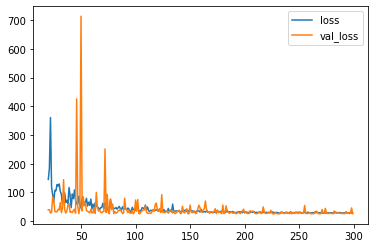

In [41]:
history_df = pd.DataFrame(history.history)
history_df.loc[20:, ['loss', 'val_loss']].plot();

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [42]:
def r2_score(y_true, y_pred):
  rss=np.sum(np.dot(y_true-y_pred,y_true-y_pred))
  tss=np.sum(np.dot(y_true-np.mean(y_true),y_true-np.mean(y_true)))
  return 1-rss/tss

In [43]:
preds=model.predict(X_test)
r2_score(y_test,preds.squeeze())

0.9981021934986285

## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

The model has the following layers:
> Input layer of size 5 \\
> Hidden layer of size 10 with relu activation \\
> Hidden layer of size 5 with relu activation \\
> Output layer of 1 unit \\

The compiler used is adam.
The loss used is MSE.
100 epochs have been used.

In [45]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=69)

In [46]:
# Your code here
model=keras.Sequential([
          tf.keras.layers.Dense(units=10, activation="relu", input_shape=[5]),
          tf.keras.layers.Dense(units=5, activation="relu"),
          tf.keras.layers.Dense(units=1)

])

In [47]:
model.compile(optimizer='adam',loss='mse',metrics='mse')

In [48]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 13608.7529 - mse: 13608.7529 - val_loss: 12586.1650 - val_mse: 12586.1650
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 12275.2715 - mse: 12275.2715 - val_loss: 10298.6240 - val_mse: 10298.6240
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 8899.3740 - mse: 8899.3740 - val_loss: 6198.0942 - val_mse: 6198.0942
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 4636.0630 - mse: 4636.0630 - val_loss: 2512.5562 - val_mse: 2512.5562
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 1721.8335 - mse: 1721.8335 - val_loss: 810.3369 - val_mse: 810.3369
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 624.6358 - mse: 624.6358 - val_loss: 359.2792 - val_mse: 359.2792
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 350.8651 - mse: 350.8651 - val_loss: 276.2025 - val_m

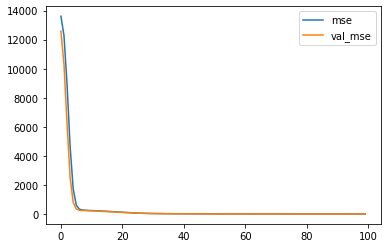

In [49]:

pd.DataFrame(history.history).loc[:,['mse', 'val_mse']].plot()

In [51]:
preds=model.predict(X_test)
r2_score(y_test,preds.squeeze())

0.9981411159417038